In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_19_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-19 00:10:00  2013-03-19  00:10:00     600  6.91322  7.1519  6.6470   
2013-03-19 00:20:00  2013-03-19  00:20:00     600  6.87650  7.1978  6.4634   
2013-03-19 00:30:00  2013-03-19  00:30:00     600  6.86732  7.1060  6.6470   
2013-03-19 00:40:00  2013-03-19  00:40:00     600  6.74798  7.0601  6.3716   
2013-03-19 00:50:00  2013-03-19  00:50:00     600  6.77552  7.0142  6.5093   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-19 00:10:00  0.09180  6.87550  7.1050  6.5542  ...   40  125  125   
2013-03-19 00:20:00  0.13311  6.83878  7.1509  6.5083  ...   40  125  125   
2013-03-19 00:30:00  0.08721  6.82042  7.0591  6.5542  ...   40  125  125   
2013-03-19 00:40:00  0.11016  6.70567  6.9673  6.4165  ...   40  125  125   
2013-03-19 00:50:00  0.09639  6.72403  7.0591  6.4165  ...   40  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-19 00:10:00  125   83   83   83   83   83   83  
2013-03-19 00:20:00  125   83   83   83   83   83   83  
2013-03-19 00:30:00  125   83   83   83   83   83   83  
2013-03-19 00:40:00  125   83   83   83   83   83   83  
2013-03-19 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean      11.359113
std        2.434635
min        6.747980
25%        9.582305
50%       11.521580
75%       13.371350
max       15.588320
Name: s1a, dtype: float64


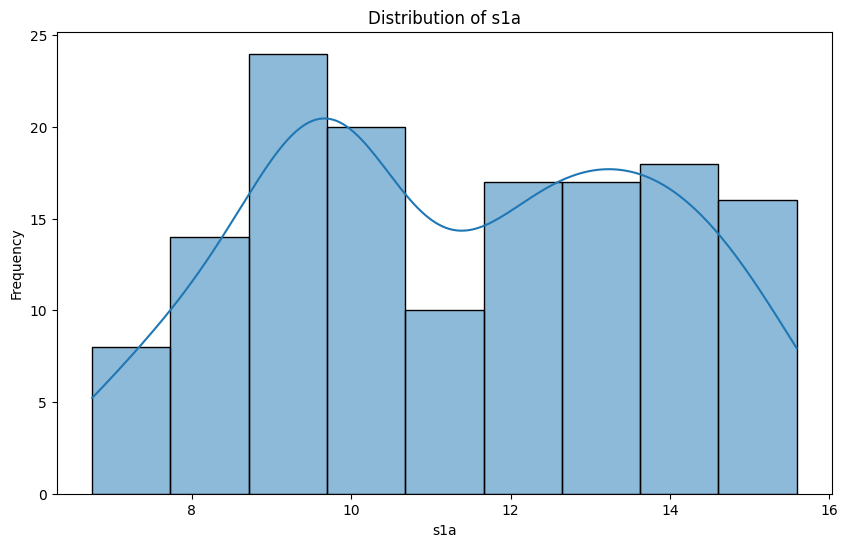


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      13.660775
std        3.142971
min        7.014200
25%       11.833700
50%       14.174600
75%       16.263050
max       18.672800
Name: s1x, dtype: float64


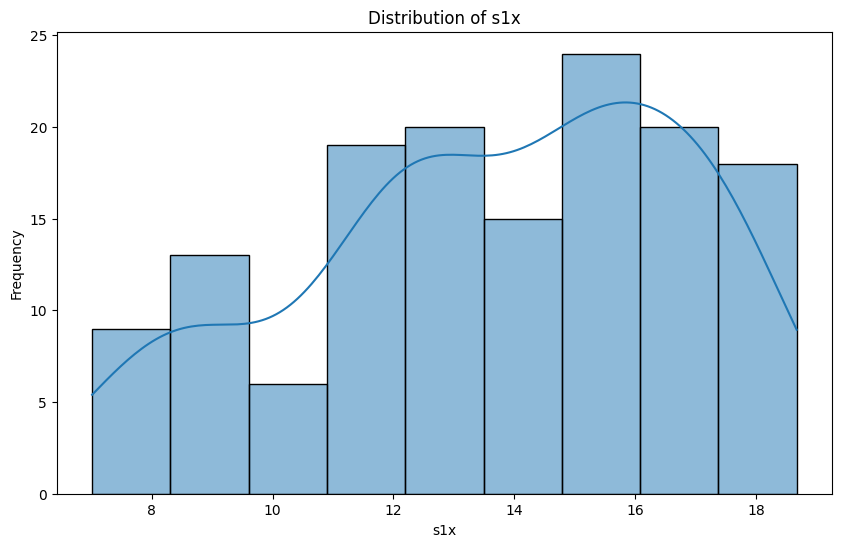


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       8.751069
std        1.904632
min        4.765100
25%        7.289600
50%        8.597750
75%       10.296050
max       12.751700
Name: s1i, dtype: float64


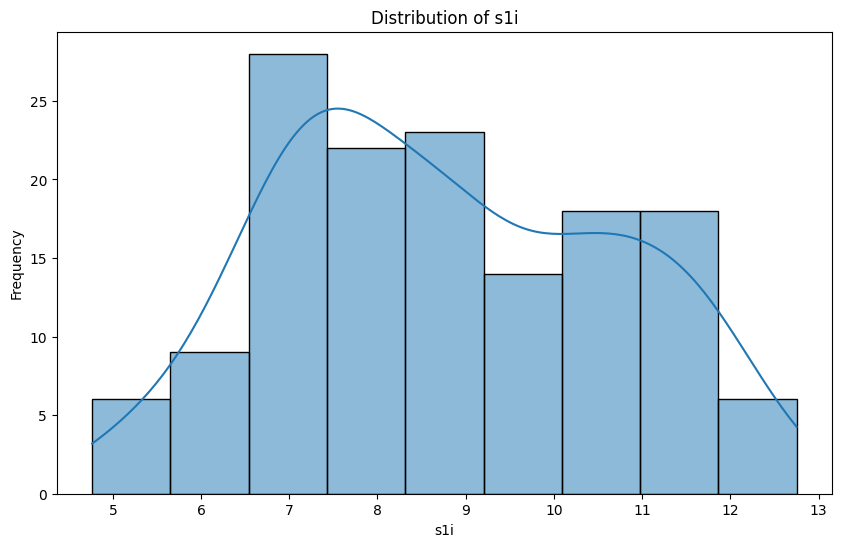


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.876594
std        0.375594
min        0.087210
25%        0.802103
50%        0.952425
75%        1.124550
max        1.510110
Name: s1s, dtype: float64


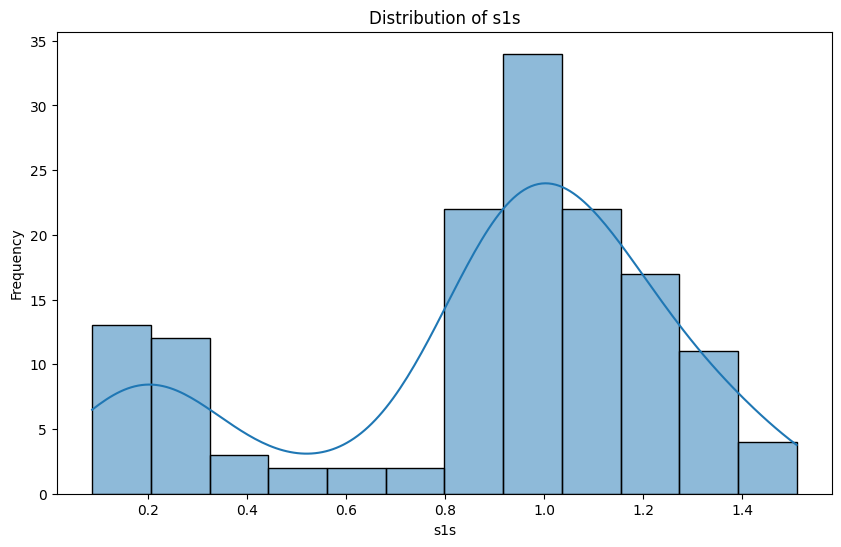


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean      11.263763
std        2.407126
min        6.705670
25%        9.499833
50%       11.426485
75%       13.234945
max       15.445030
Name: s2a, dtype: float64



Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      13.542475
std        3.116096
min        6.967300
25%       11.672050
50%       14.035900
75%       16.147300
max       18.488200
Name: s2x, dtype: float64



Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       8.607906
std        1.853091
min        4.764100
25%        7.139425
50%        8.436100
75%       10.180300
max       12.521200
Name: s2i, dtype: float64



Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.879049
std        0.376621
min        0.087210
25%        0.808987
50%        0.959310
75%        1.139468
max        1.514700
Name: s2s, dtype: float64



Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean      10.592201
std        2.221467
min        6.369580
25%        9.046093
50%       10.504760
75%       12.502397
max       14.456460
Name: s3a, dtype: float64


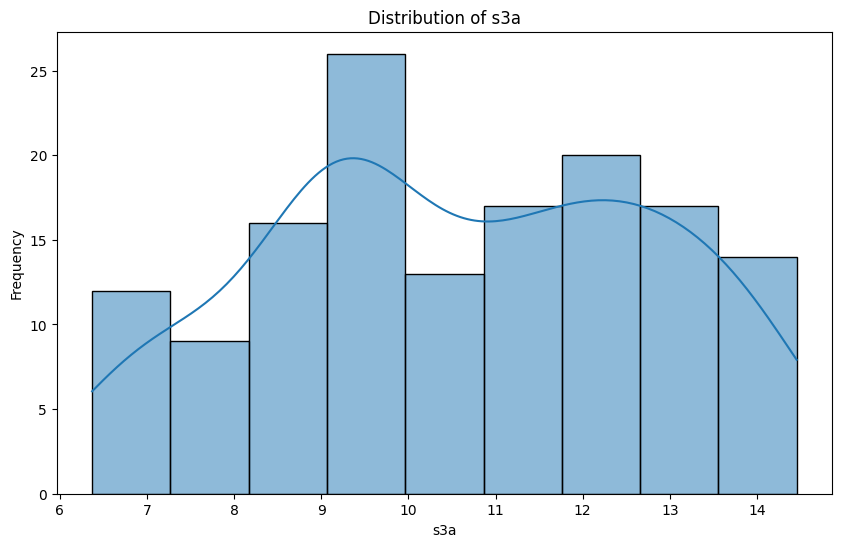


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      13.029649
std        3.060518
min        6.690670
25%       11.312072
50%       13.364755
75%       15.405970
max       17.974690
Name: s3x, dtype: float64


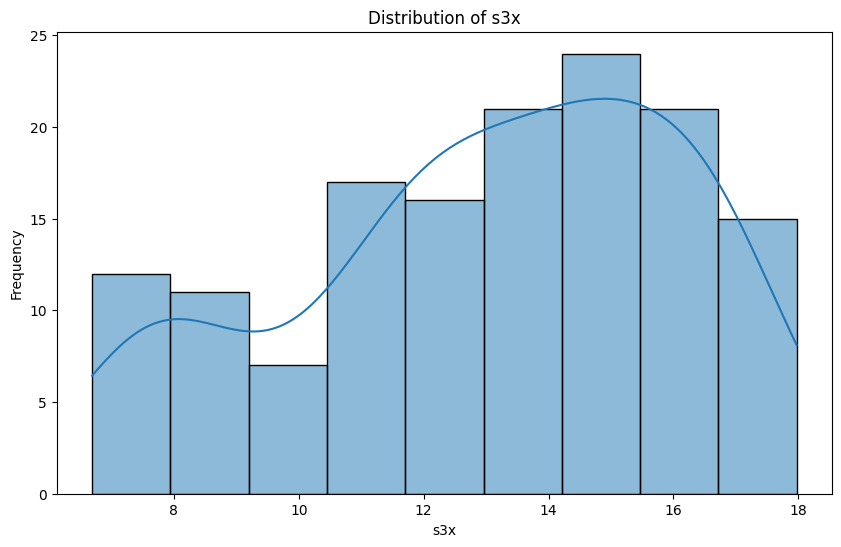


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       7.763837
std        1.526253
min        4.626520
25%        6.495722
50%        7.562200
75%        9.030040
max       11.369410
Name: s3i, dtype: float64


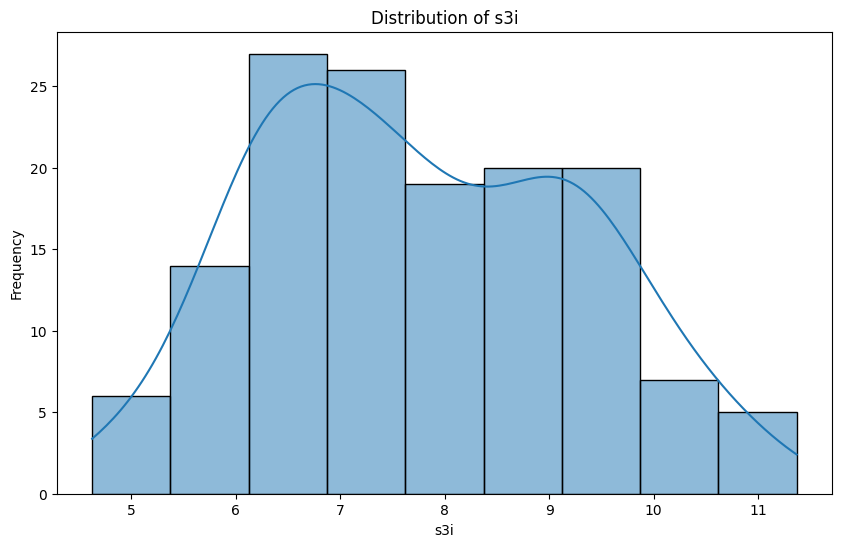


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.944603
std        0.404408
min        0.091740
25%        0.850888
50%        1.043545
75%        1.196060
max        1.591690
Name: s3s, dtype: float64


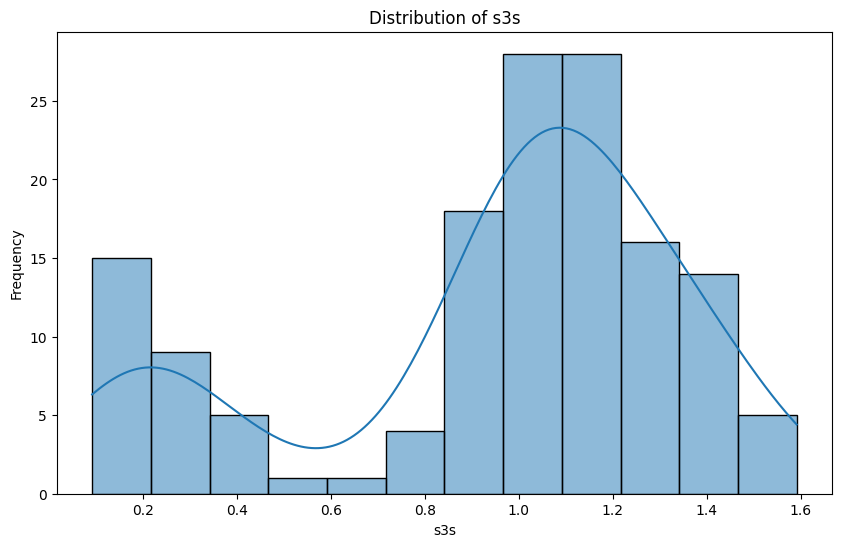


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     239.131944
std      160.730990
min        1.000000
25%        6.000000
50%      343.500000
75%      356.000000
max      360.000000
Name: d1a, dtype: float64


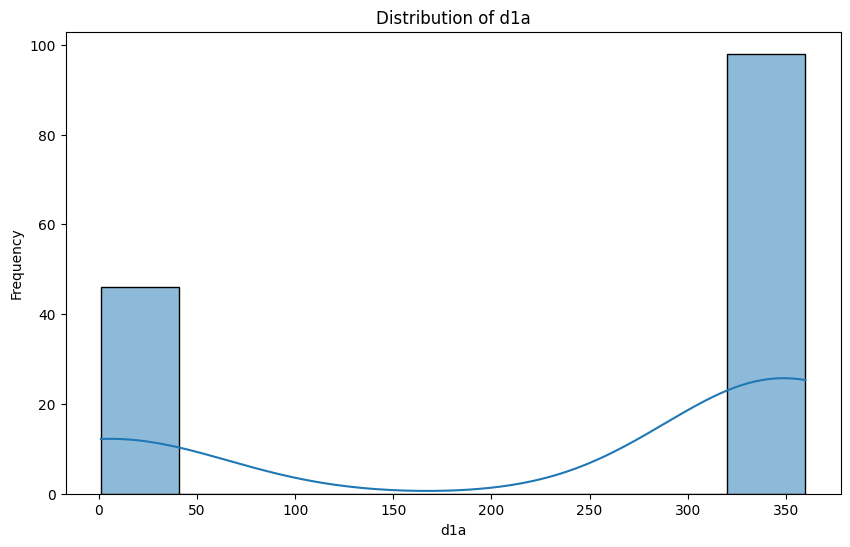


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.687500
std        1.682775
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: d1s, dtype: float64


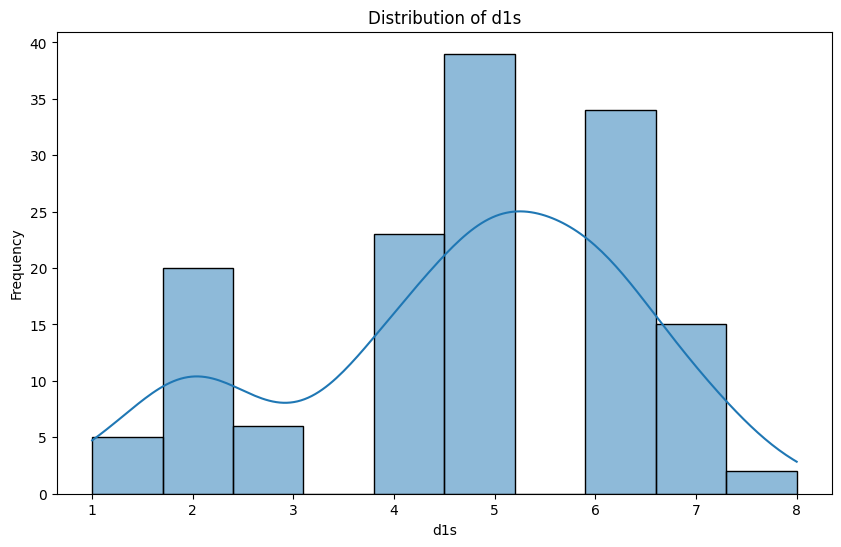


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     259.548611
std      147.052953
min        1.000000
25%      243.000000
50%      335.500000
75%      355.000000
max      360.000000
Name: d2a, dtype: float64


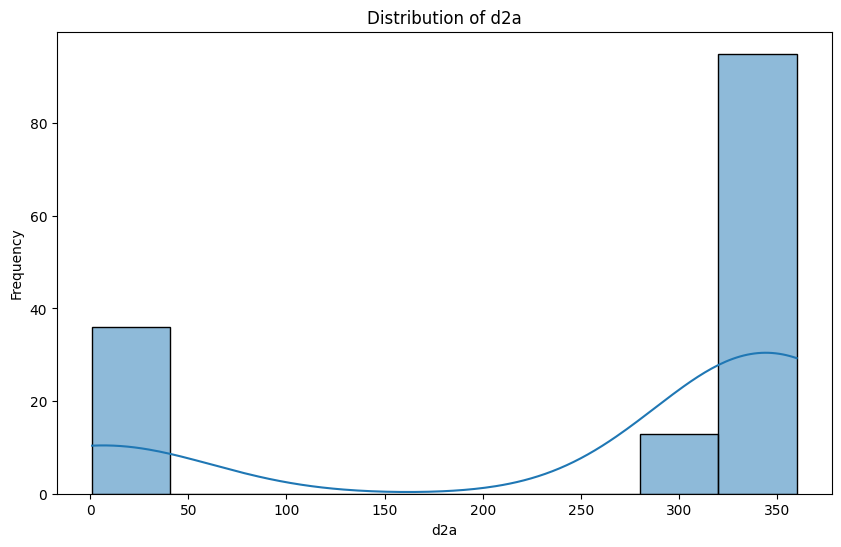


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       7.229167
std        2.854805
min        1.000000
25%        5.000000
50%        8.000000
75%        9.000000
max       13.000000
Name: d2s, dtype: float64


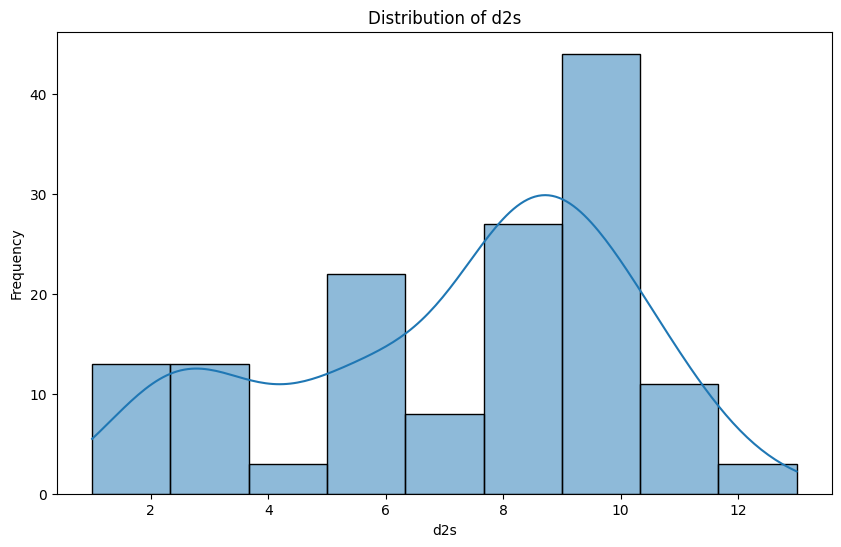


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      87.694444
std        7.113739
min       75.000000
25%       82.000000
50%       86.000000
75%       96.000000
max       98.000000
Name: h1a, dtype: float64


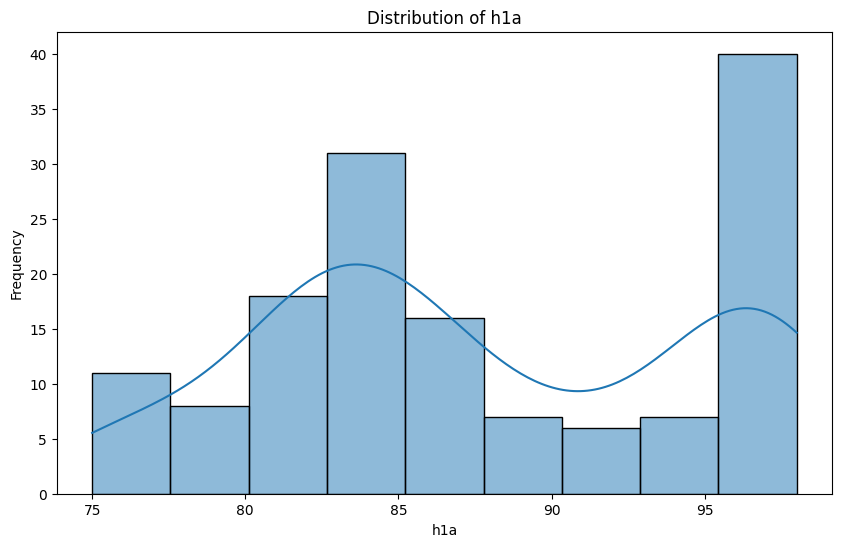


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      88.152778
std        7.069406
min       75.000000
25%       83.000000
50%       86.500000
75%       96.000000
max       99.000000
Name: h1x, dtype: float64


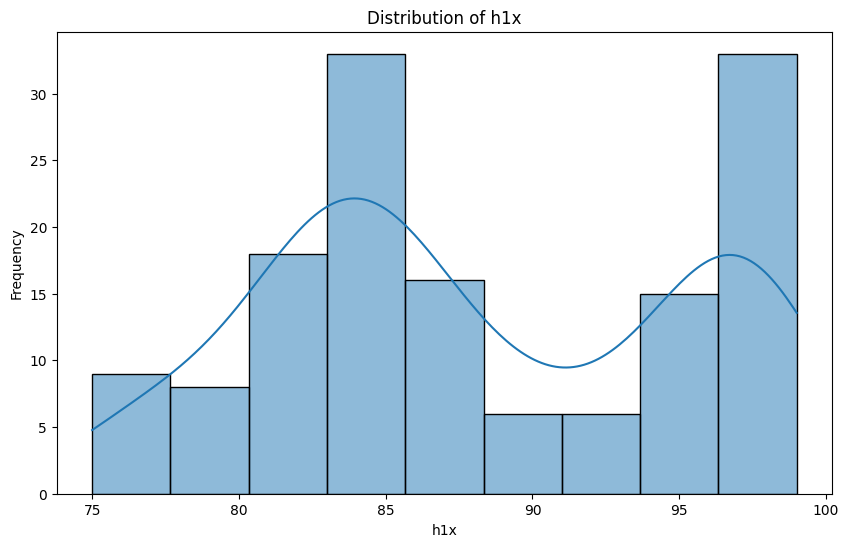


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      87.236111
std        7.227556
min       74.000000
25%       82.000000
50%       85.500000
75%       96.000000
max       98.000000
Name: h1i, dtype: float64


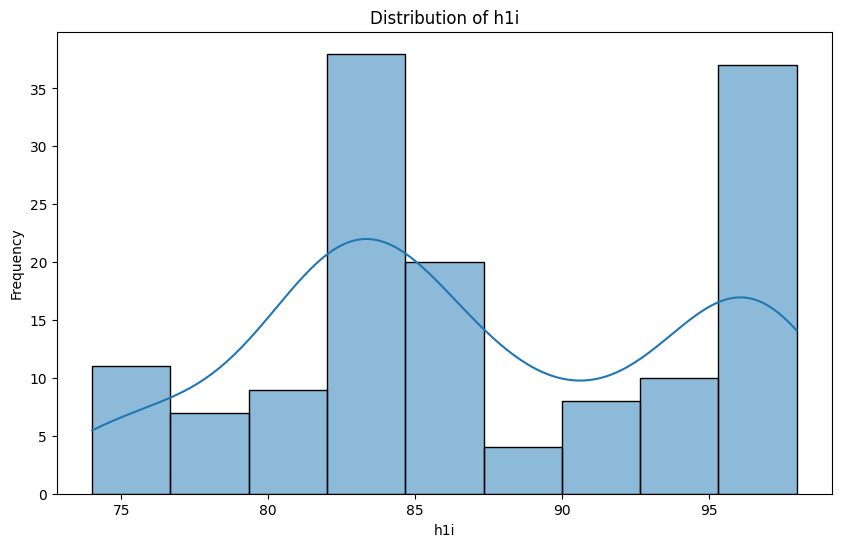


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       4.906250
std        1.373308
min        2.450000
25%        3.625000
50%        5.450000
75%        6.050000
max        7.050000
Name: t1a, dtype: float64


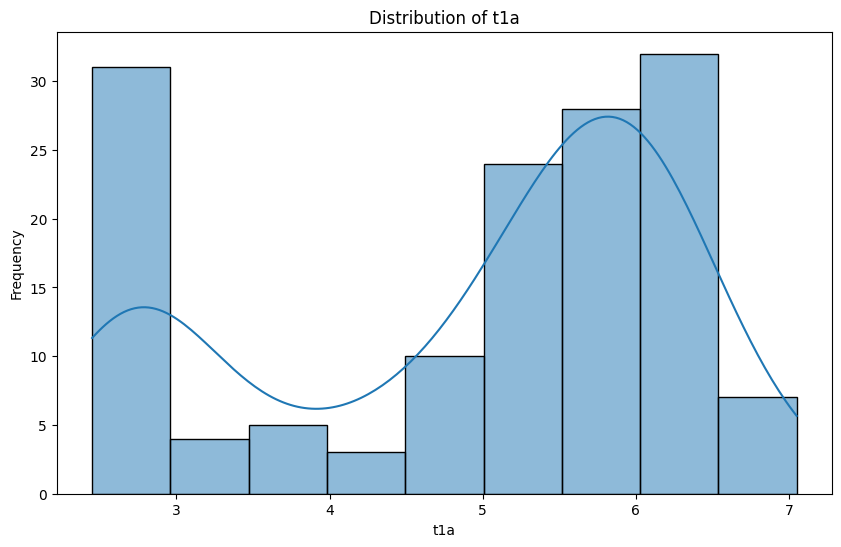


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       4.964583
std        1.384528
min        2.450000
25%        3.625000
50%        5.450000
75%        6.050000
max        7.150000
Name: t1x, dtype: float64



Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       4.848611
std        1.366328
min        2.450000
25%        3.525000
50%        5.350000
75%        5.950000
max        6.950000
Name: t1i, dtype: float64


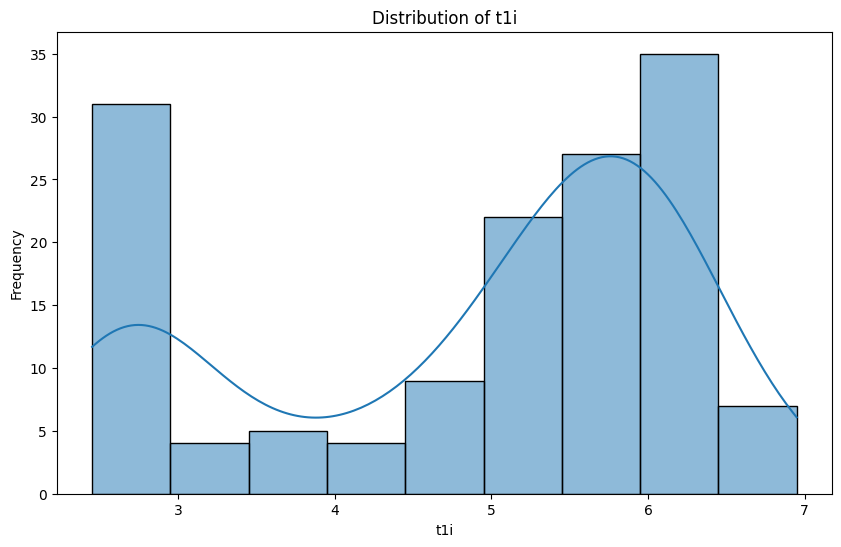


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1006.354167
std         4.299079
min      1000.000000
25%      1003.000000
50%      1005.000000
75%      1010.000000
max      1015.000000
Name: b1a, dtype: float64


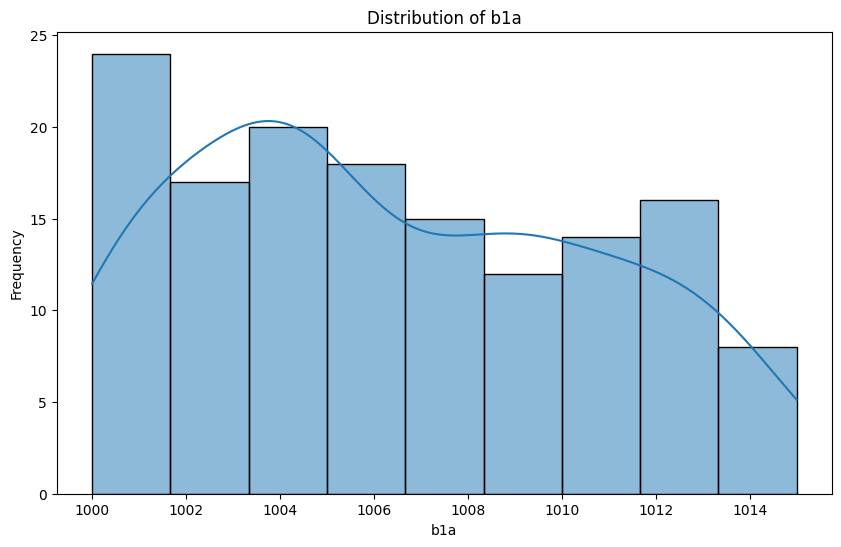


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1006.819444
std         4.309126
min      1001.000000
25%      1003.750000
50%      1006.000000
75%      1010.000000
max      1015.000000
Name: b1x, dtype: float64


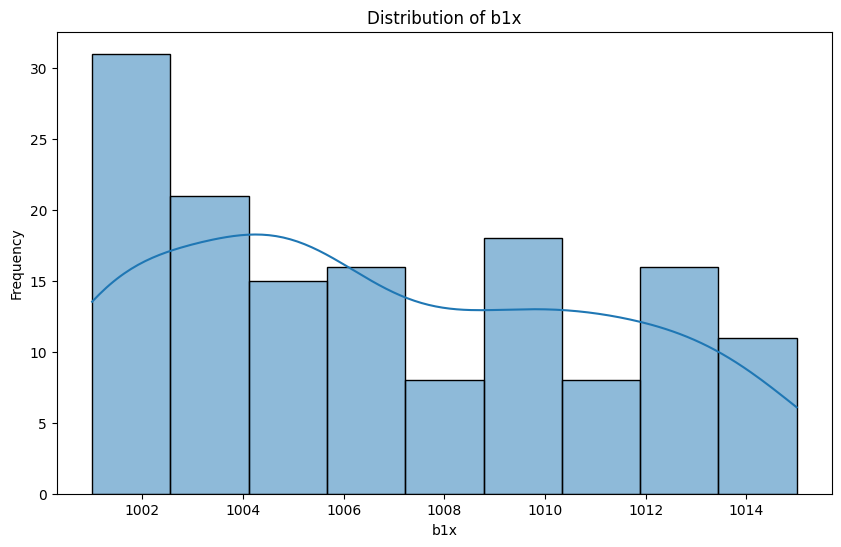


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1006.013889
std         4.343609
min      1000.000000
25%      1003.000000
50%      1005.000000
75%      1009.000000
max      1014.000000
Name: b1i, dtype: float64



Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       9.395137
std        2.068597
min        5.060590
25%        8.281557
50%        9.432390
75%       10.942000
max       13.345690
Name: p1a, dtype: float64


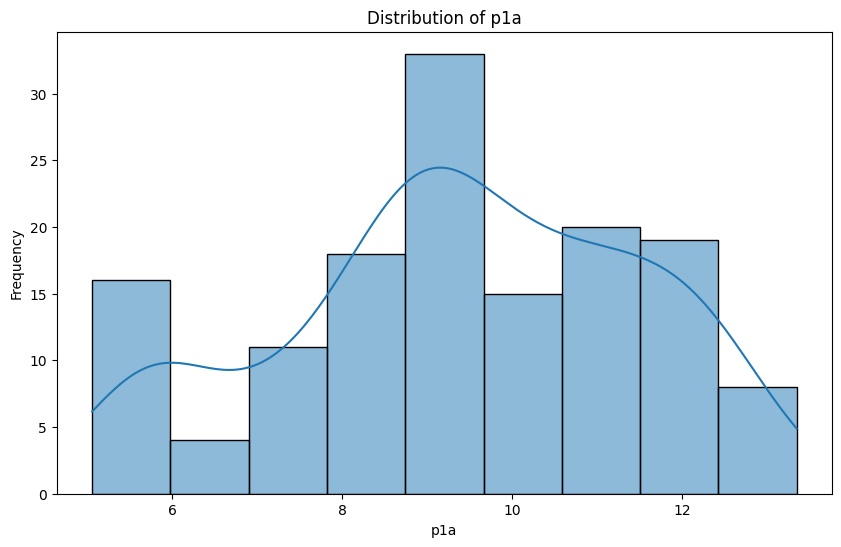


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean      12.154413
std        3.125394
min        5.500750
25%       10.945437
50%       12.561650
75%       14.498812
max       18.292900
Name: p1x, dtype: float64


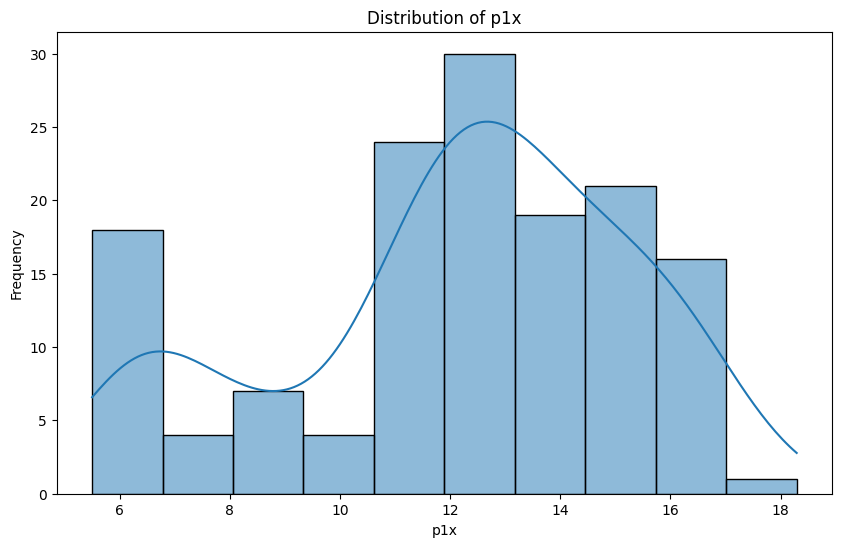


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       6.253773
std        1.240004
min        4.354500
25%        5.179800
50%        6.050950
75%        7.197200
max        9.260450
Name: p1i, dtype: float64


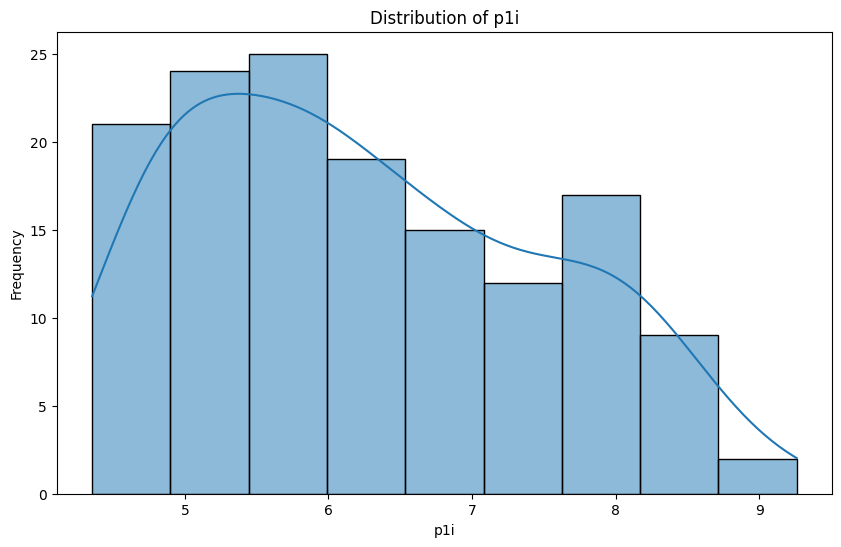


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       1.078337
std        0.440946
min        0.128380
25%        0.999530
50%        1.187520
75%        1.362893
max        1.774400
Name: p1s, dtype: float64



Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      45.215278
std        2.511966
min       40.000000
25%       44.000000
50%       46.000000
75%       47.000000
max       48.000000
Name: tia, dtype: float64


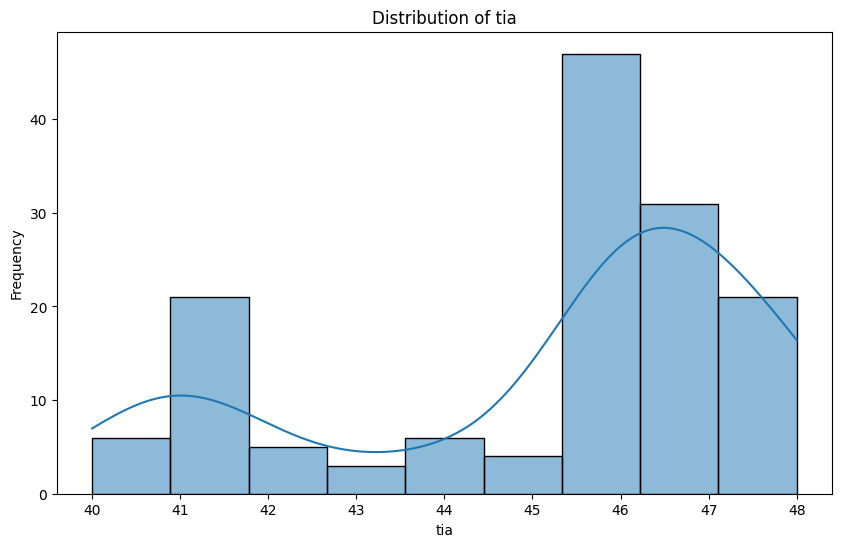


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      45.243056
std        2.506625
min       40.000000
25%       44.000000
50%       46.000000
75%       47.000000
max       48.000000
Name: tix, dtype: float64



Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      45.166667
std        2.519851
min       40.000000
25%       43.750000
50%       46.000000
75%       47.000000
max       48.000000
Name: tii, dtype: float64



Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.611111
std        5.701320
min      124.000000
25%      126.000000
50%      127.000000
75%      137.250000
max      139.000000
Name: vxa, dtype: float64



Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.048611
std        6.001550
min      124.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      143.000000
Name: vxx, dtype: float64



Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.277778
std        5.556379
min      124.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      138.000000
Name: vxi, dtype: float64


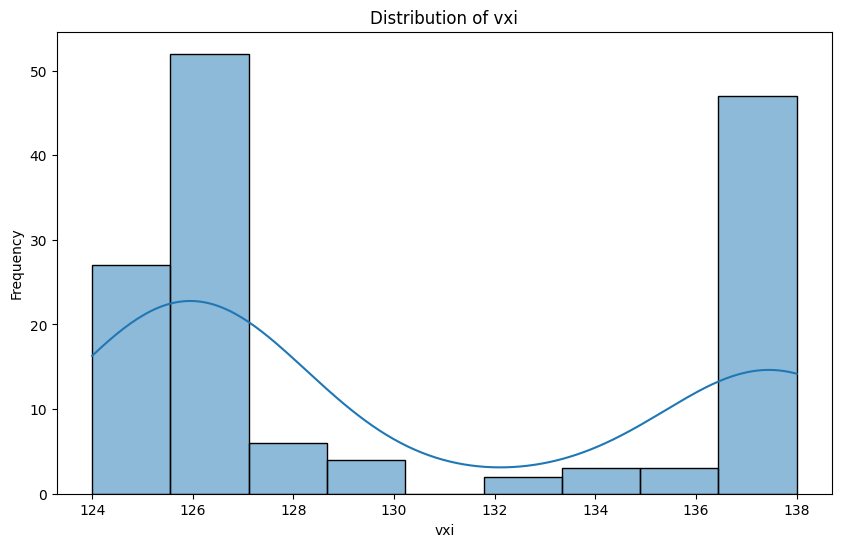


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


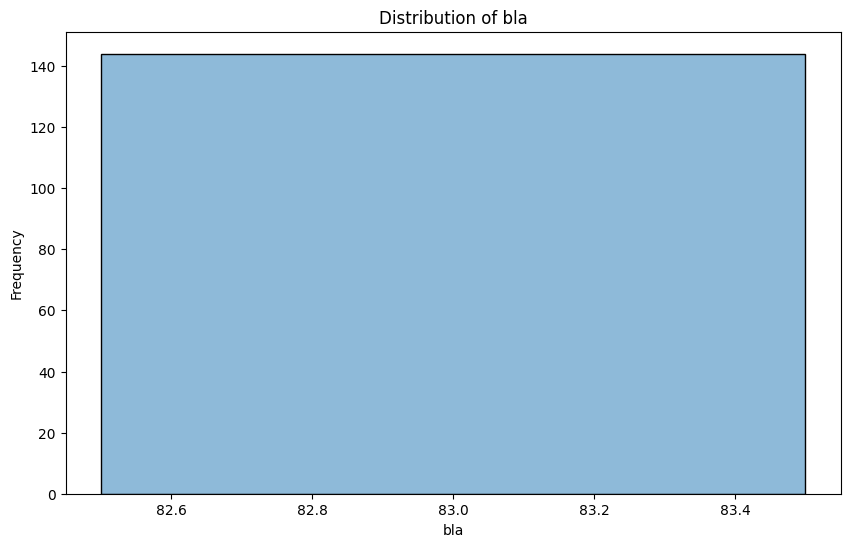


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


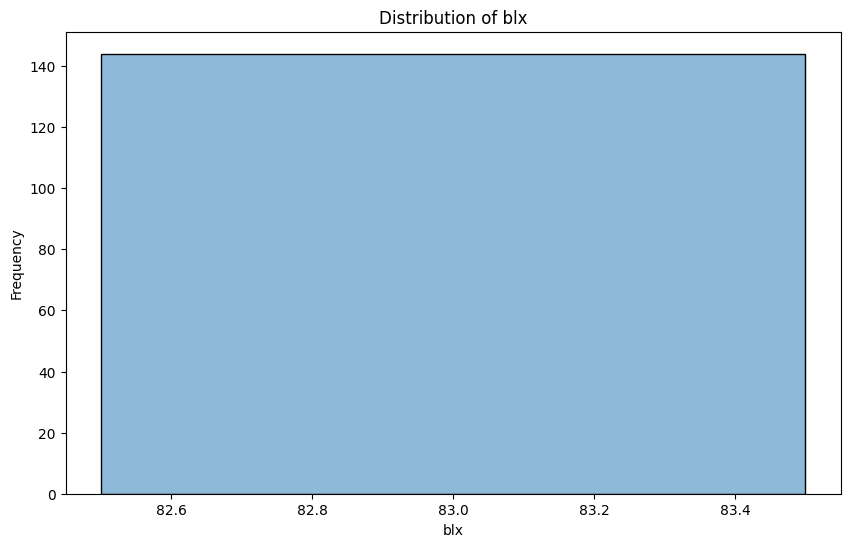


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.965278
std        0.183714
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


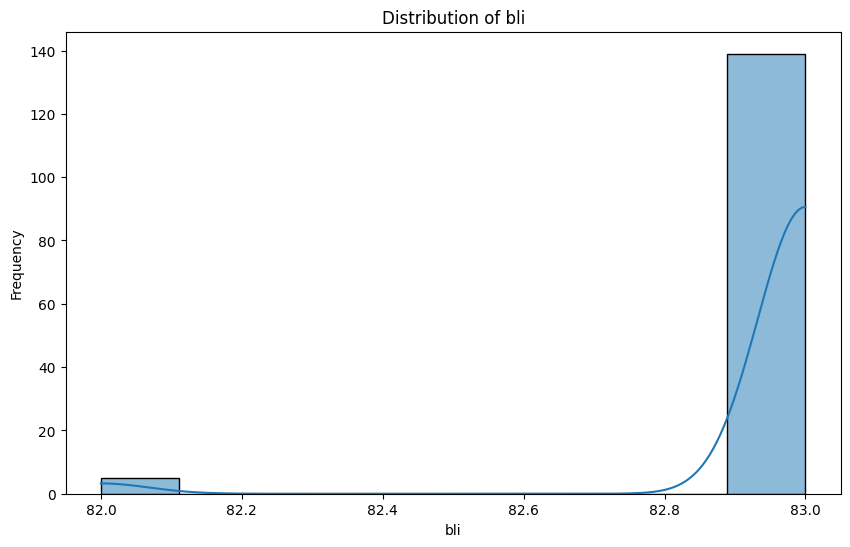


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


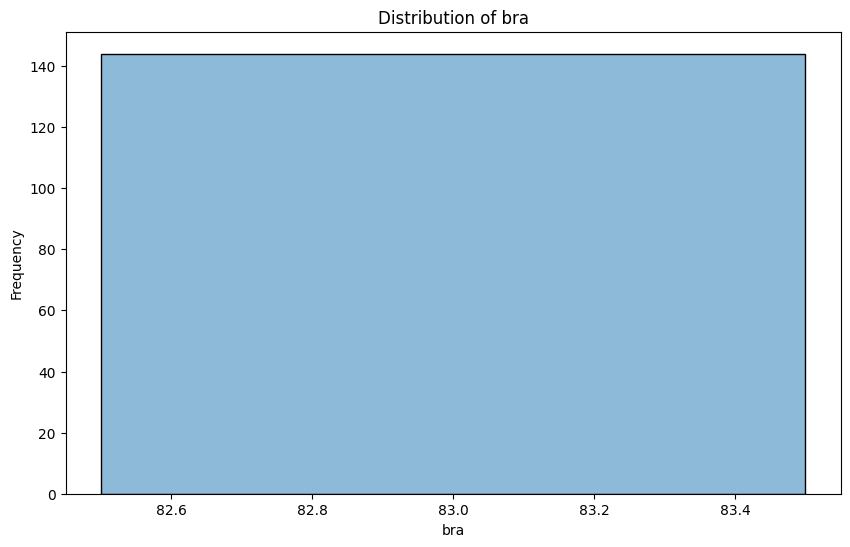


Analysis for column: brx
Descriptive Statistics:
count    144.000000
mean      83.006944
std        0.083333
min       83.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       84.000000
Name: brx, dtype: float64



Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


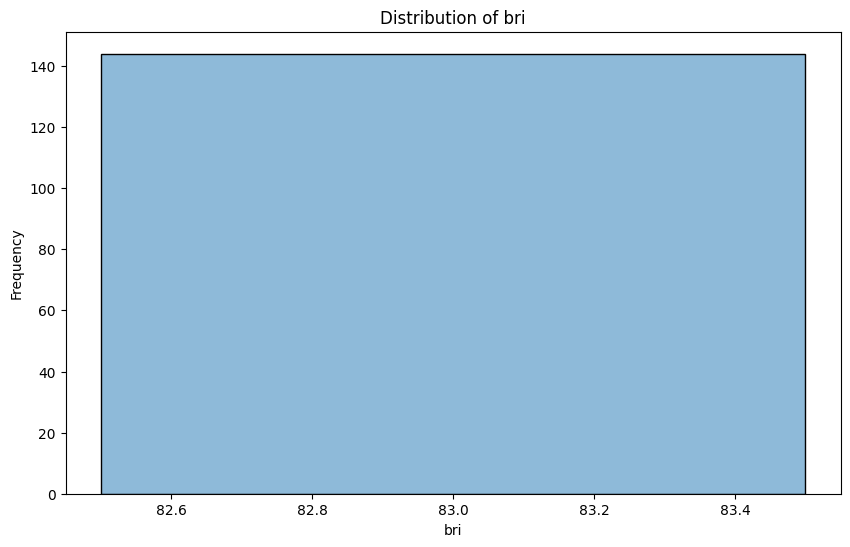

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

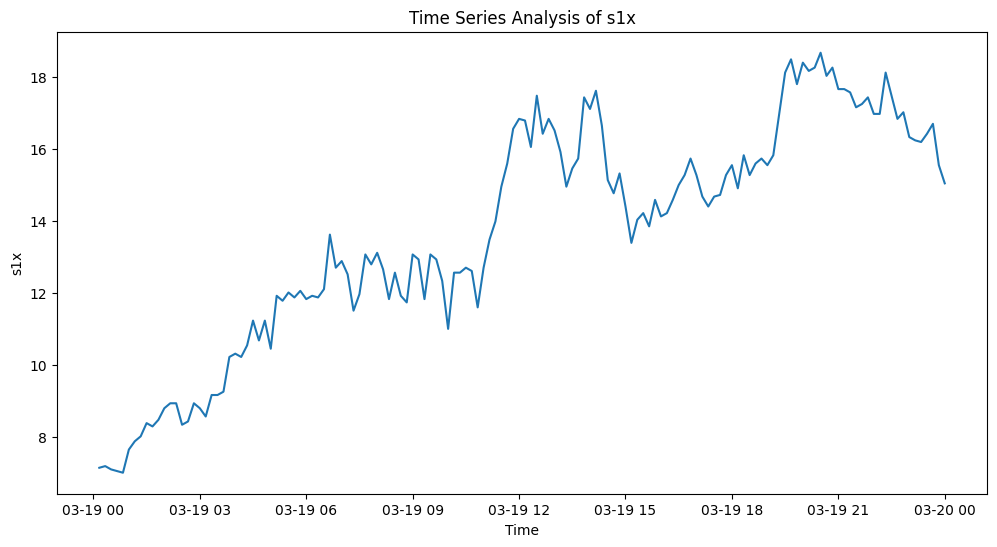

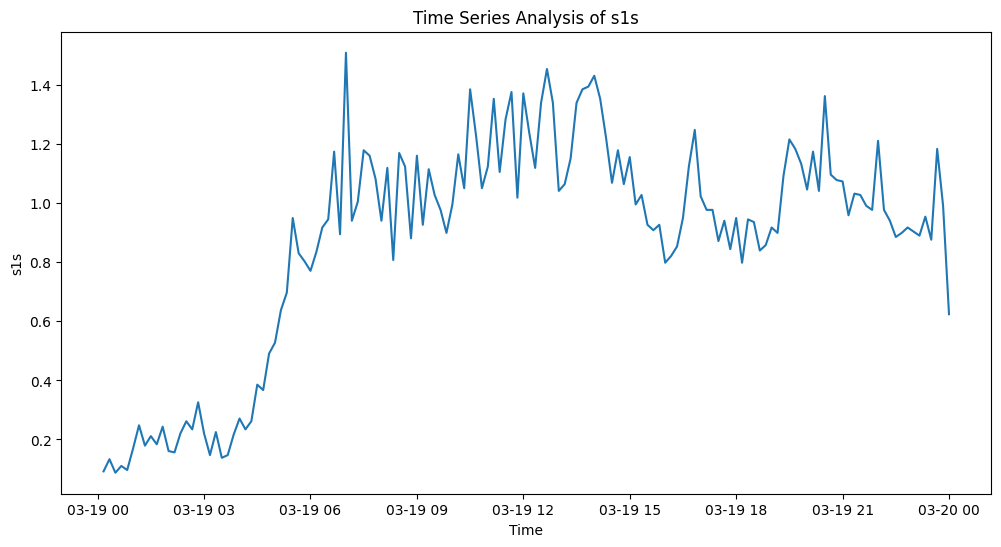

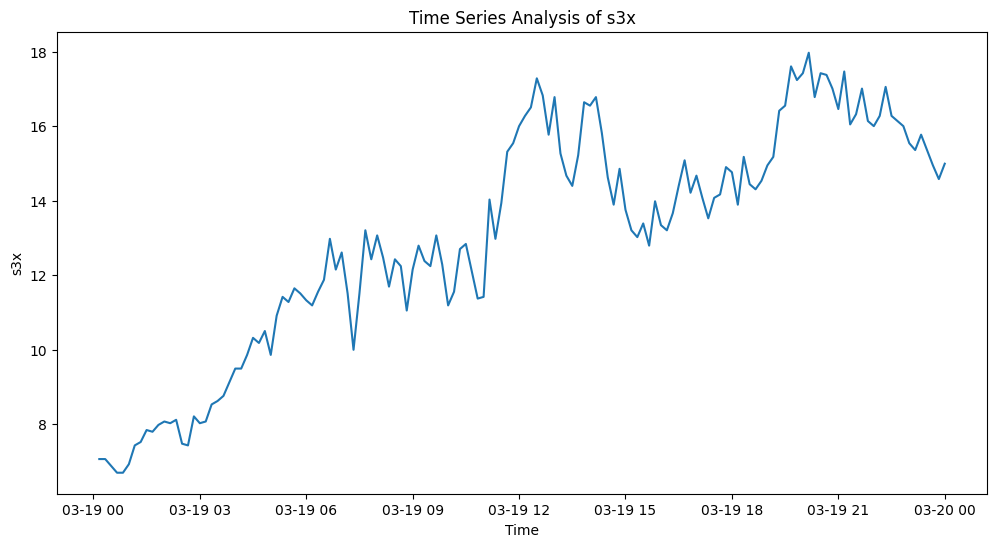

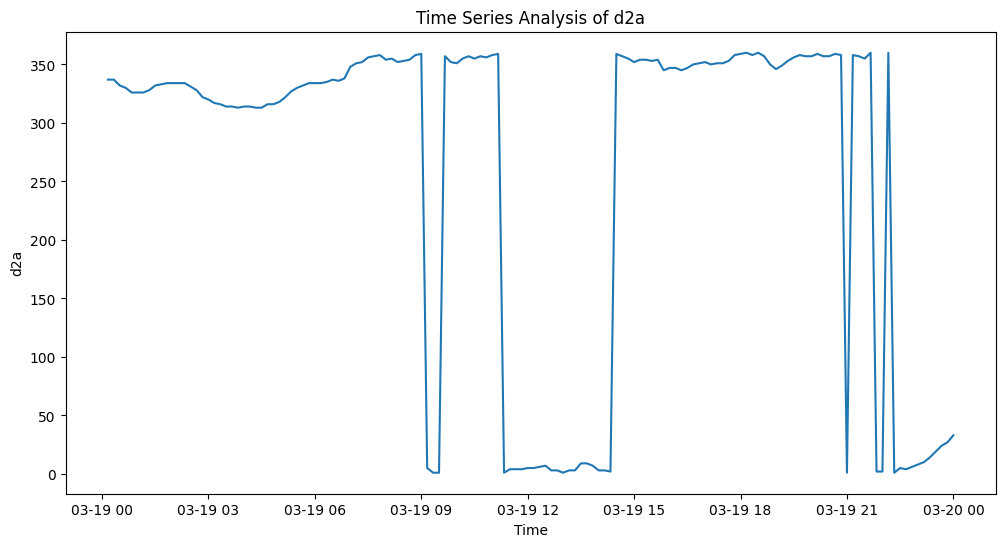

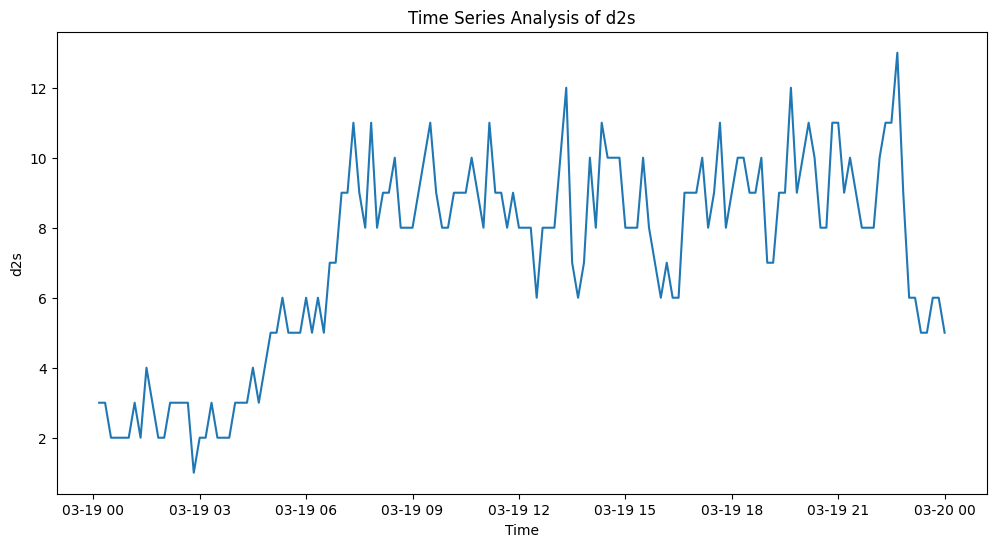

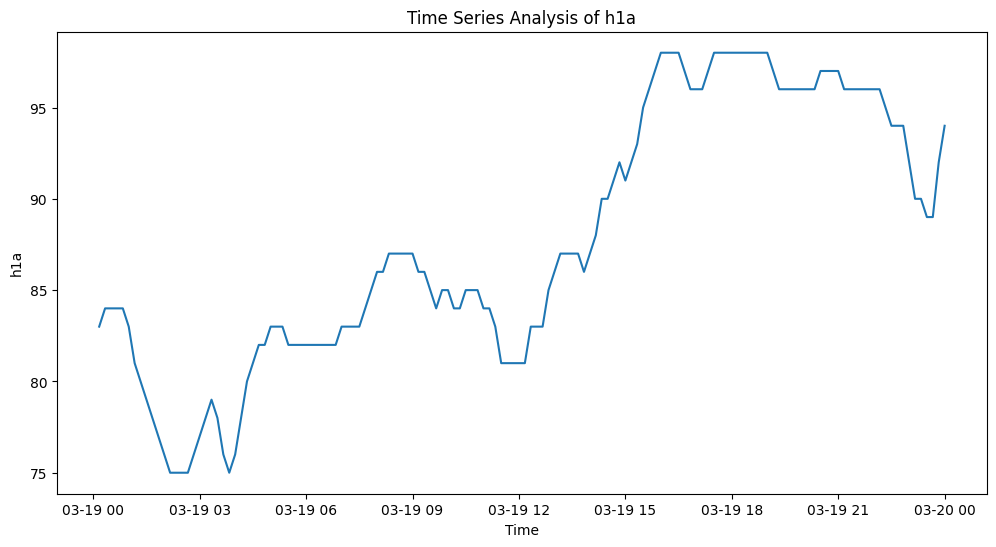

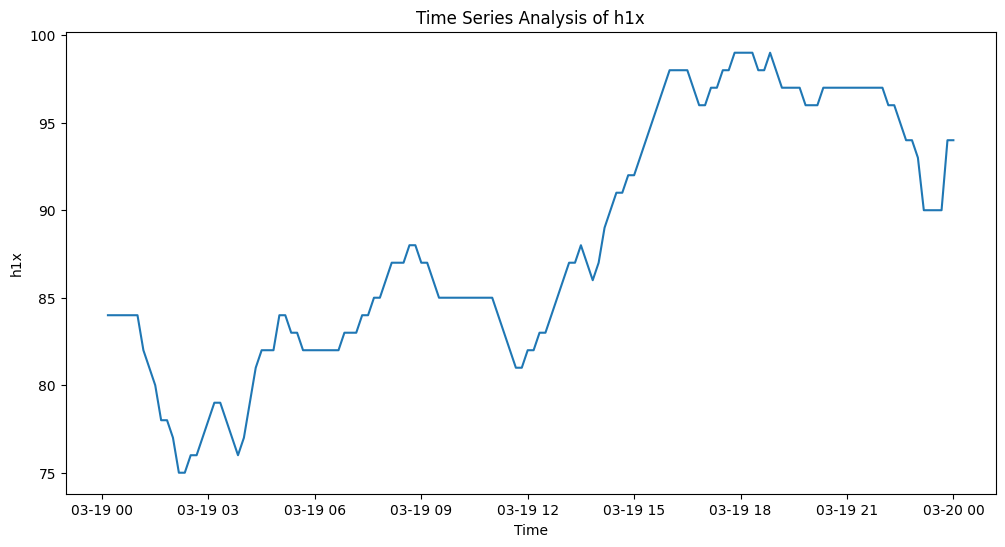

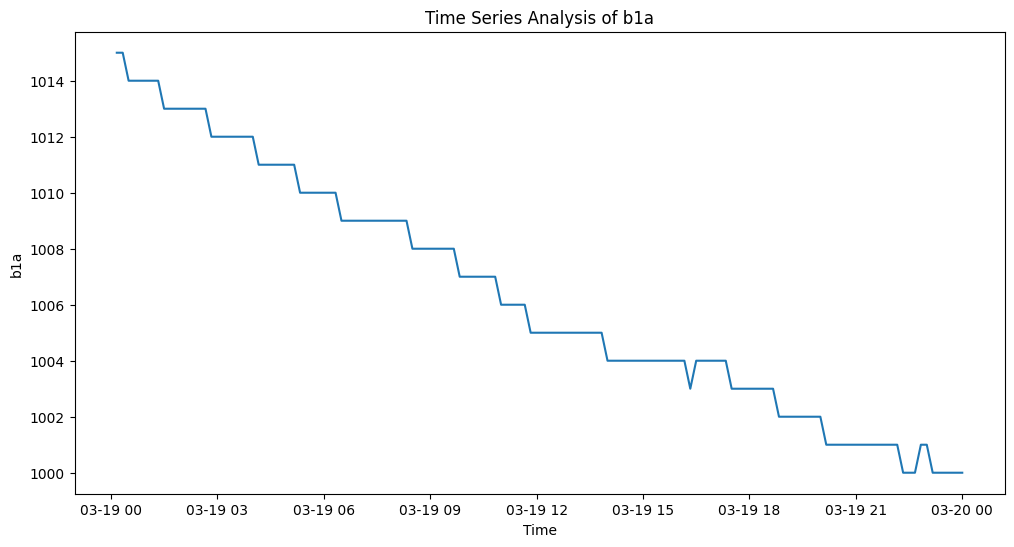

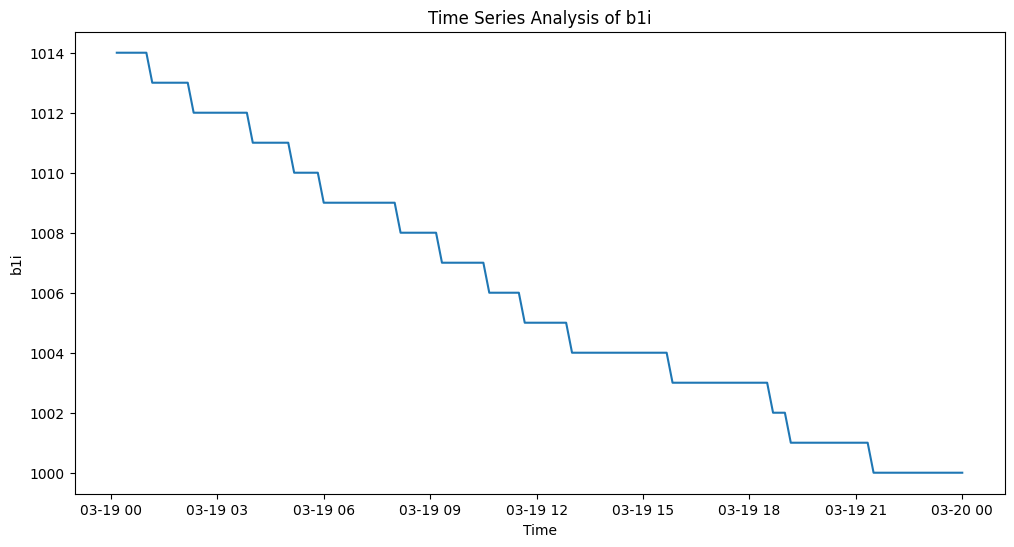

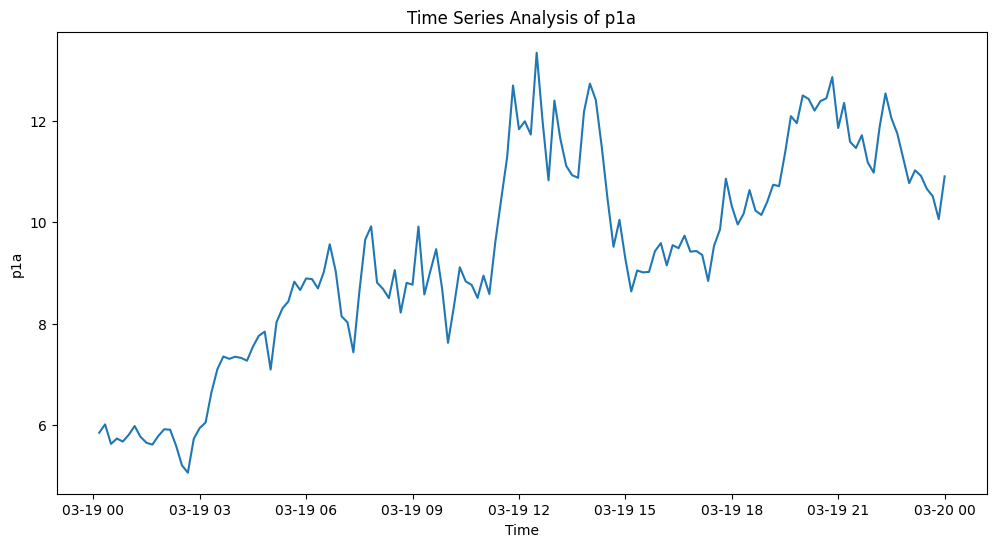

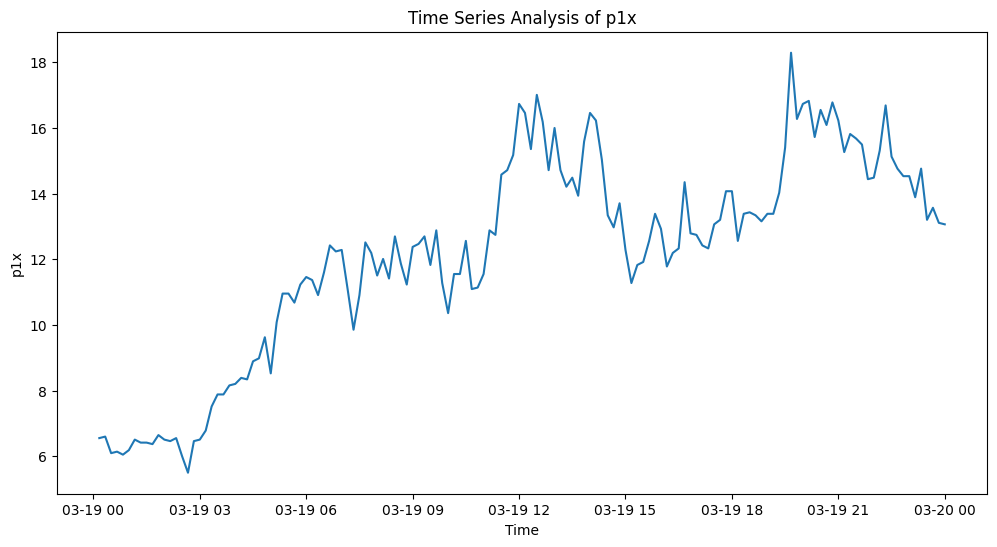

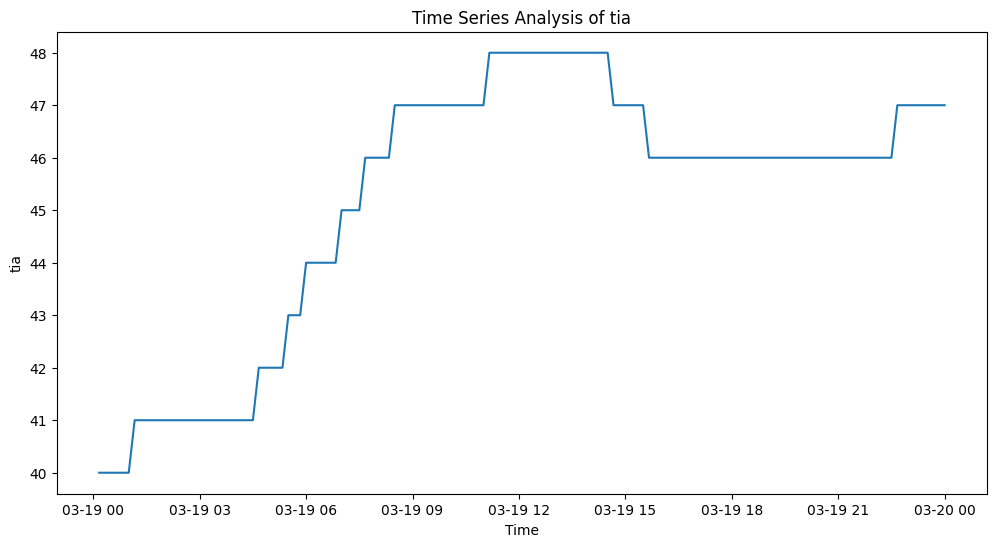

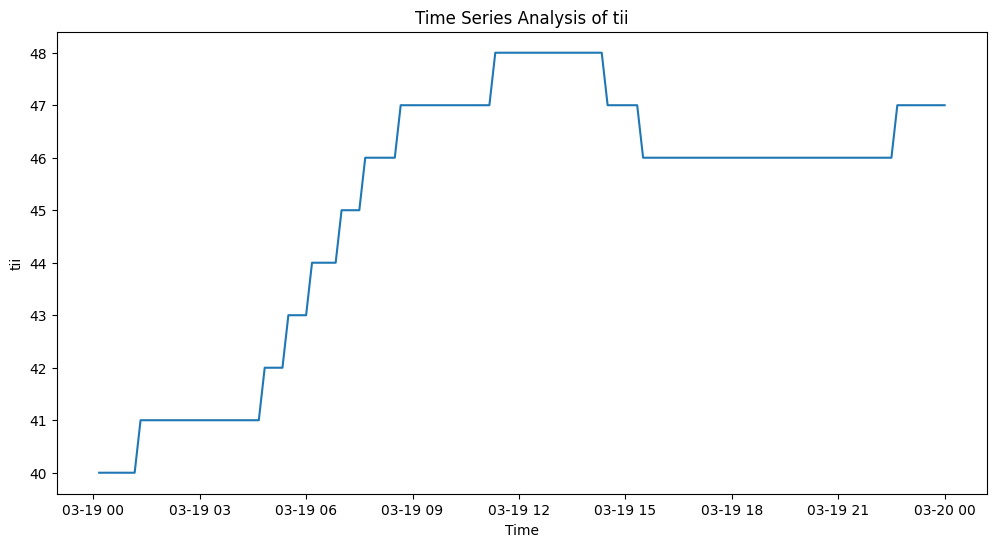

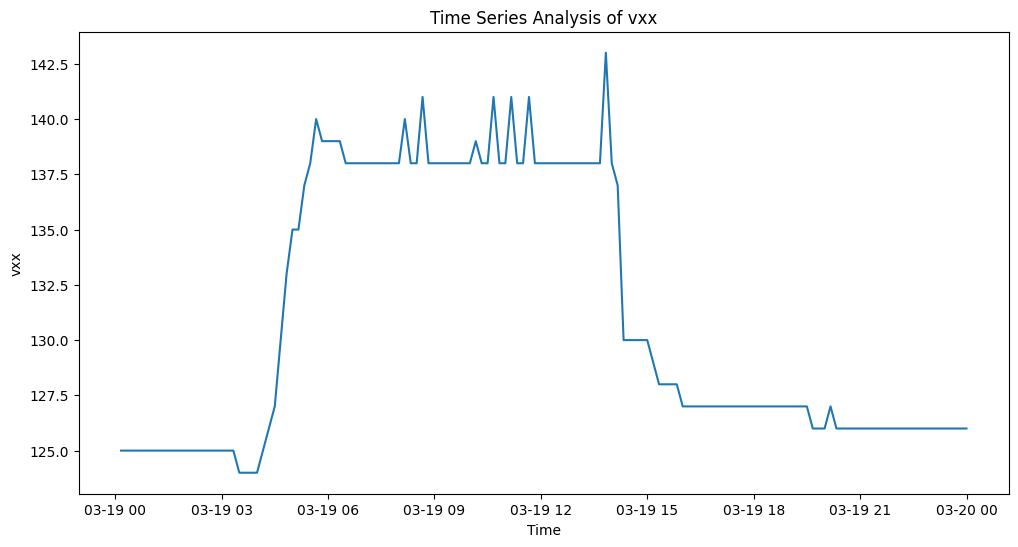

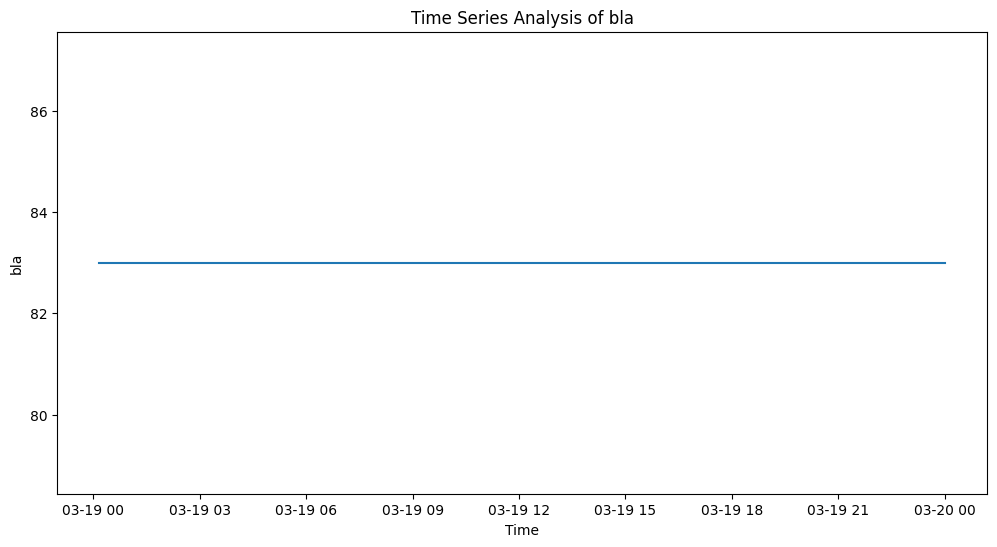

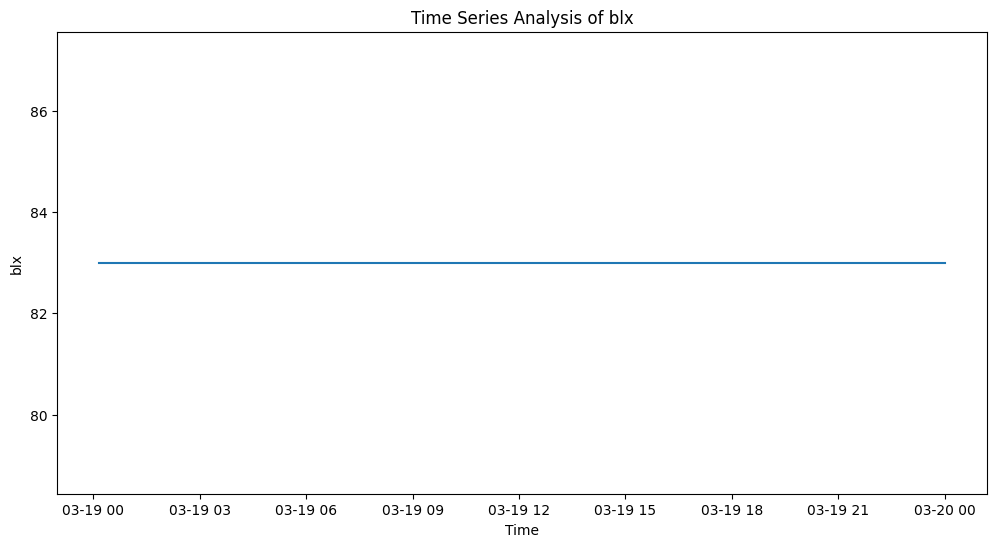

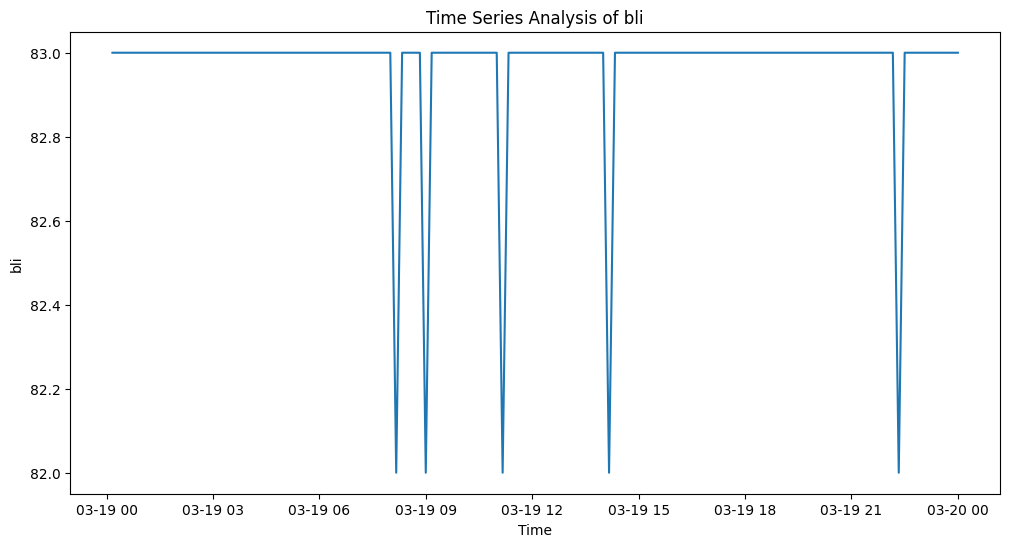

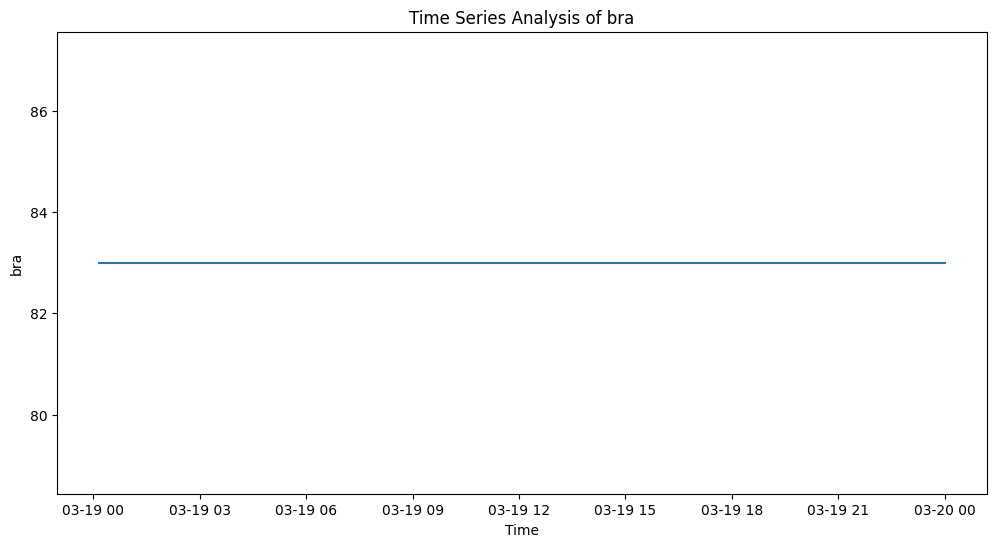

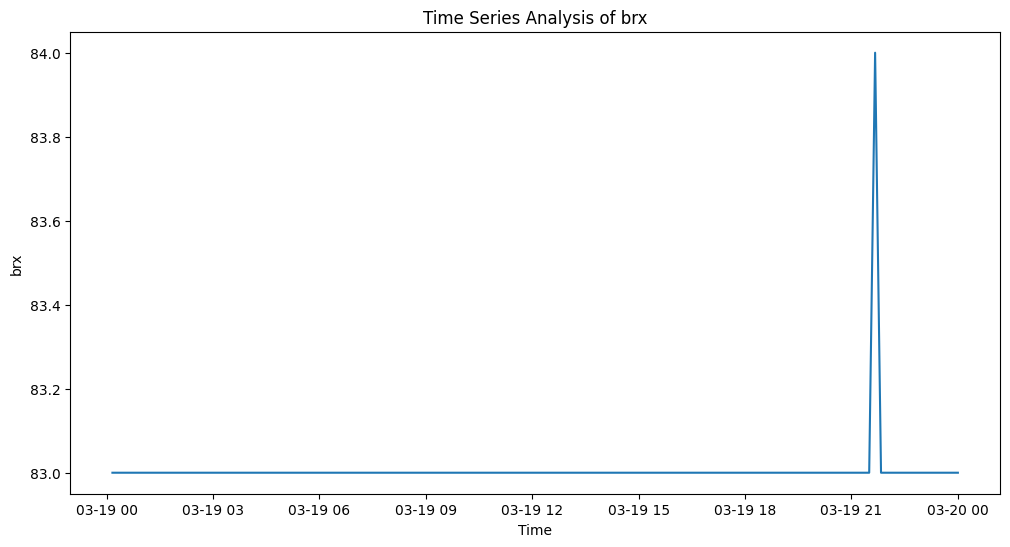

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [8]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

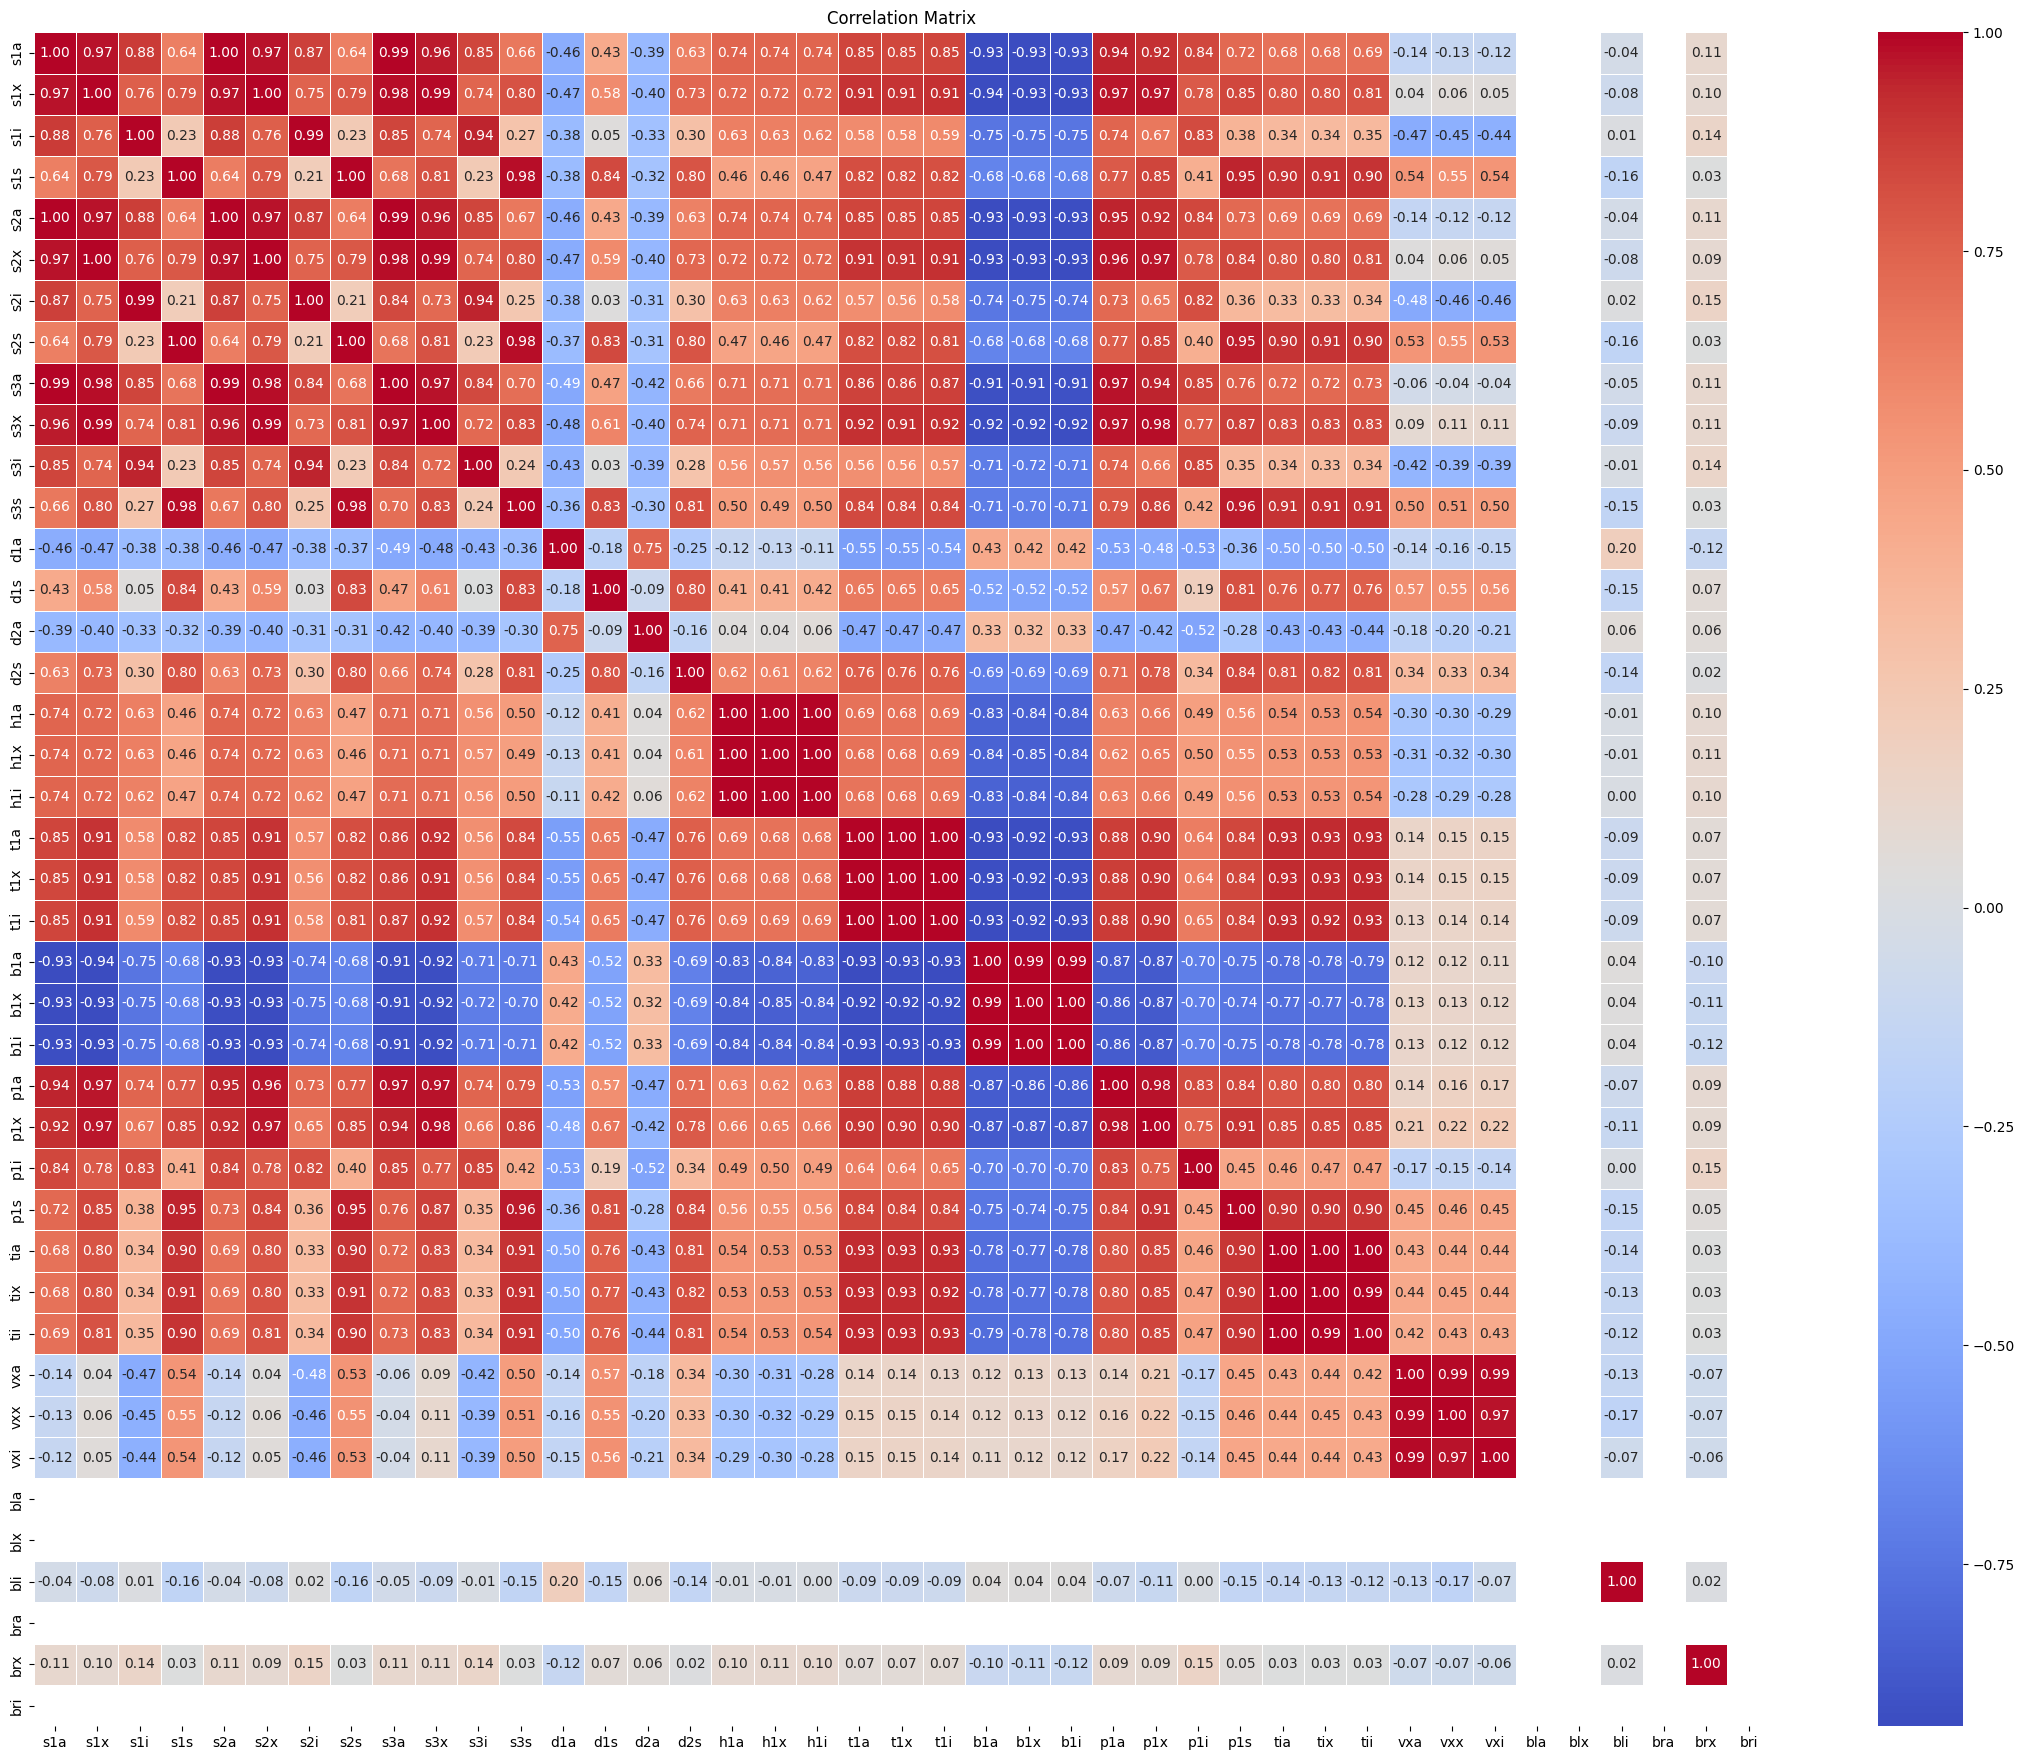

In [9]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para